# Week 1 Work

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
train_path = "/kaggle/input/waste-classification-data/DATASET/TRAIN"
test_path = "/kaggle/input/waste-classification-data/DATASET/TEST"

In [3]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [4]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [01:30<00:00, 139.54it/s]


In [5]:
data.shape

(22564, 2)

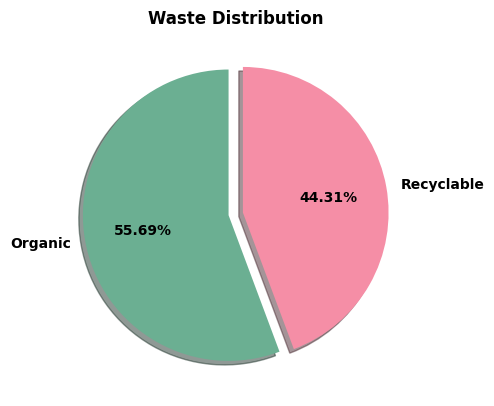

In [6]:
colors = ["#6BAF92", "#F58EA6"] 

plt.figure(figsize=(5, 5))  
plt.pie(
    data.label.value_counts(), 
    labels=["Organic", "Recyclable"], 
    autopct="%0.2f%%", 
    colors=colors, 
    startangle=90,
    explode=[0.05, 0.05],
    shadow=True,  
    textprops={"fontsize": 10, "fontweight": "bold"},  
)
plt.title("Waste Distribution", fontsize=12, fontweight="bold") 
plt.tight_layout()  
plt.show()

# Week 2 Work

In [7]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

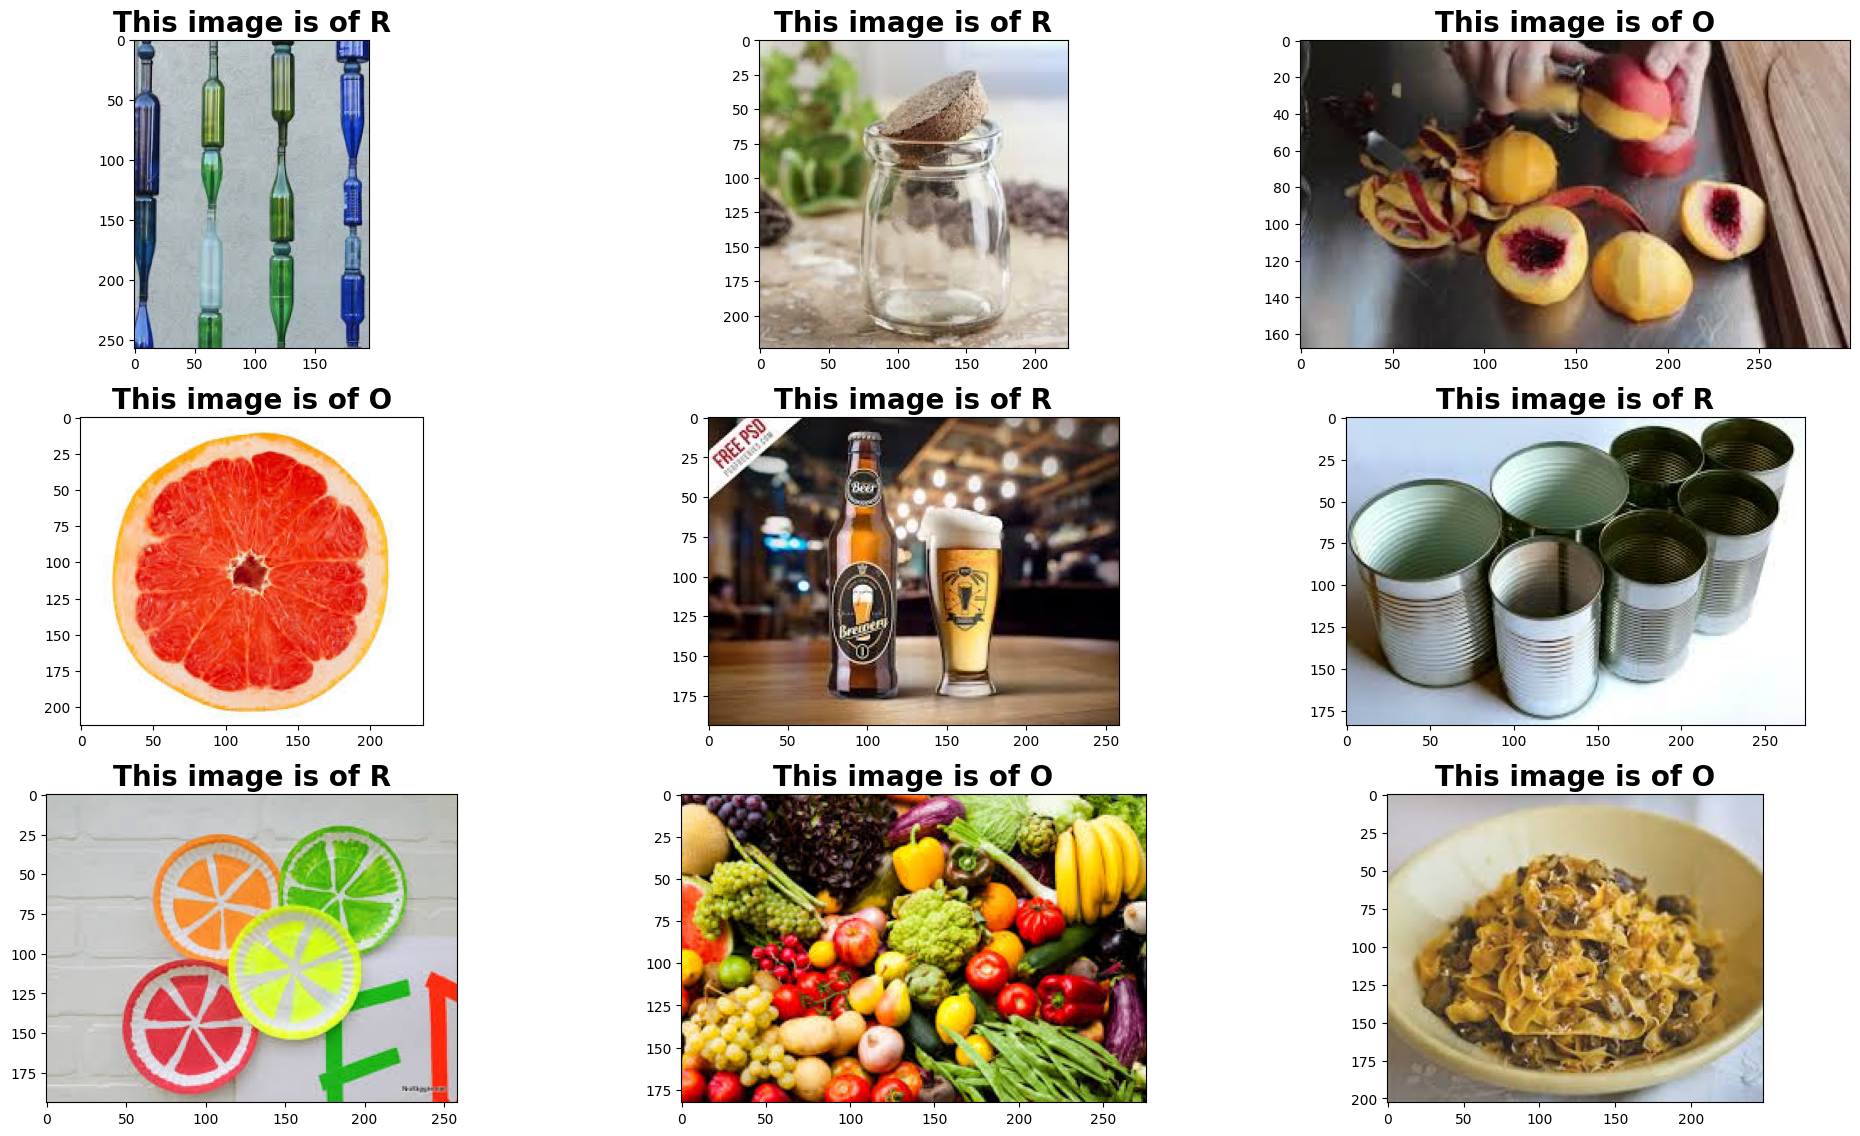

In [8]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [9]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

In [11]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [12]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [14]:
hist = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)

Epoch 1/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1328s 15s/step - accuracy: 0.6679 - loss: 0.7343 - val_accuracy: 0.8802 - val_loss: 0.3790
Epoch 2/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1328s 15s/step - accuracy: 0.8199 - loss: 0.4323 - val_accuracy: 0.8743 - val_loss: 0.3384
Epoch 3/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1353s 15s/step - accuracy: 0.8192 - loss: 0.4268 - val_accuracy: 0.8735 - val_loss: 0.3146
Epoch 4/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1350s 15s/step - accuracy: 0.8430 - loss: 0.3830 - val_accuracy: 0.8786 - val_loss: 0.3227
Epoch 5/5
89/89 ━━━━━━━━━━━━━━━━━━━━ 1299s 15s/step - accuracy: 0.8606 - loss: 0.3481 - val_accuracy: 0.8631 - val_loss: 0.3380
